**Time Series Forecasting**

The objective of this section is to develop predicitive models that forecast the number of views per product based on historical trend.

By predicitng product popularity, the <span style="color:blue">customer service team</span> can prepare for potential inqueries, ensuring a proactive and timely responses to customer needs. The prediction also supports the <span style="color:blue">inventory managment team</span> maintain optimal stock levels, prevent overstocking of less popular items, and ensure availability of in-demand products.

Ultimately, this model can boots operational efficiency, increase customer satisfaction, and improve overall business performance.


In [1]:
# # install required libraries
# !pip install psycopg2-binary pandas sqlalchemy
# !pip install prophet

# import required libraries
import pandas as pd
import psycopg2
from prophet import Prophet

/opt/anaconda3/envs/dataproj/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
# Set up your database connection details
conn = psycopg2.connect(
    dbname="xxxx",
    user="xxxx",
    password="xxxx",
    host="xxxx",
    port="xxxx"
)

# Create a cursor object
cursor = conn.cursor()


In [3]:
# SQL query
query = "select * from product_views_analysis_dbt_model"


# Execute the query and Fetch the results
cursor.execute(query)
data = cursor.fetchall()
# Load into a DataFrame
df = pd.DataFrame(data)


In [4]:
# rename df columns
df = df.rename(columns={0:"date",1:"category",2:"product_id",3:"view_counts"})

# transform date format
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df

,date,category,product_id,view_counts
0,2008-04-01,trousers ...,A9,35
1,2008-04-01,trousers ...,A8,25
2,2008-04-01,trousers ...,A7,33
3,2008-04-01,trousers ...,A6,33
4,2008-04-01,trousers ...,A5,50
...,...,...,...,...
26226,2008-08-13,sale ...,P13,2
26227,2008-08-13,sale ...,P12,1
26228,2008-08-13,sale ...,P11,4
26229,2008-08-13,sale ...,P10,2


In [5]:
# Find the top 3 popular products 
df[['product_id','view_counts']].groupby(['product_id']).sum().sort_values(['view_counts'],ascending=False).head(3)

,view_counts
product_id,
B4,3579
A2,3013
A11,2789


/var/folders/sf/xcxfhpf12ls2y2sthdf73z_80000gn/T/ipykernel_54736/779264346.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.rename(columns={"date":"ds","view_counts":"y"},inplace=True)
20:57:12 - cmdstanpy - INFO - Chain [1] start processing


20:57:12 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/envs/dataproj/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/envs/dataproj/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
/opt/anaconda3/envs/dataproj/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a 

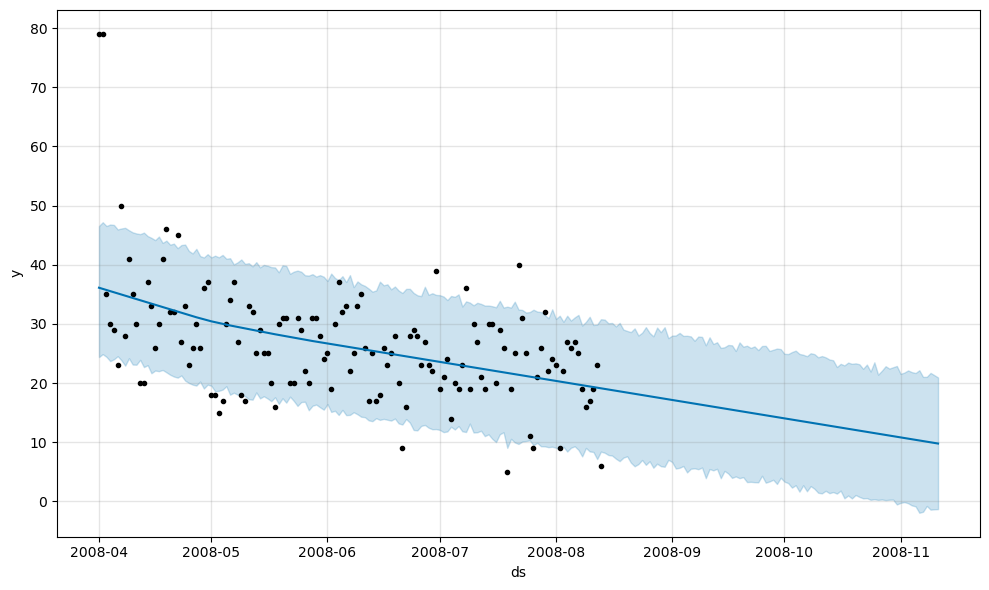

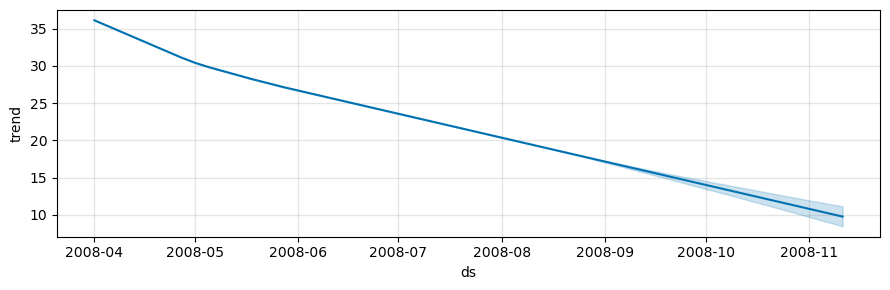

In [6]:
product_id = 'B4'
filtered_data = df[df['product_id']==product_id]
filtered_data.rename(columns={"date":"ds","view_counts":"y"},inplace=True)
model = Prophet(
    weekly_seasonality=False
)
model.fit(filtered_data)
future_dates = model.make_future_dataframe(periods=90)
forecast = model.predict(future_dates)
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)

/var/folders/sf/xcxfhpf12ls2y2sthdf73z_80000gn/T/ipykernel_54736/3847061402.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.rename(columns={"date":"ds","view_counts":"y"},inplace=True)
20:57:12 - cmdstanpy - INFO - Chain [1] start processing
20:57:12 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/envs/dataproj/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/envs/dataproj/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydate

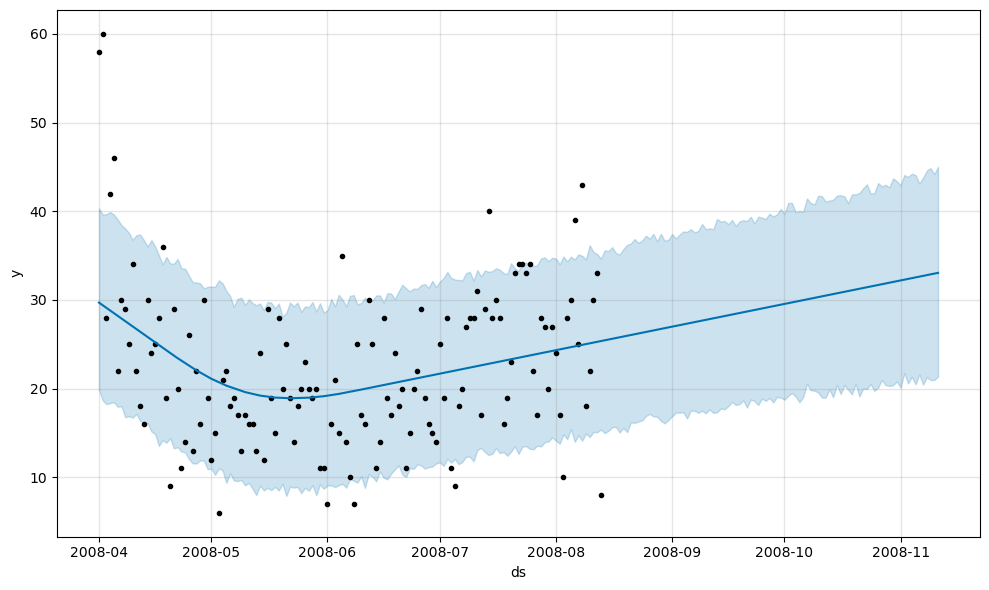

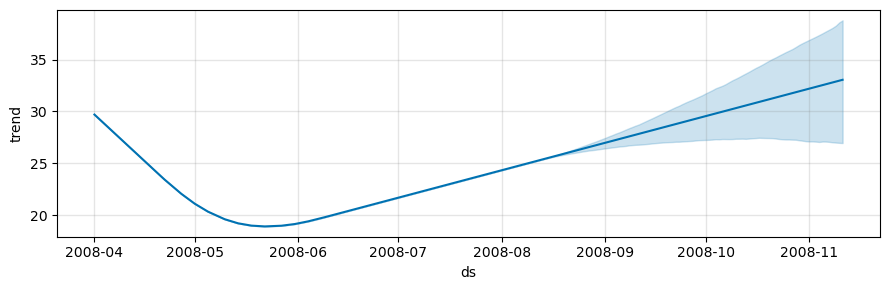

In [7]:
product_id = 'A2'
filtered_data = df[df['product_id']==product_id]
filtered_data.rename(columns={"date":"ds","view_counts":"y"},inplace=True)
model = Prophet(
    weekly_seasonality=False
)
model.fit(filtered_data)
future_dates = model.make_future_dataframe(periods=90)
forecast = model.predict(future_dates)
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)


/var/folders/sf/xcxfhpf12ls2y2sthdf73z_80000gn/T/ipykernel_54736/40205571.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.rename(columns={"date":"ds","view_counts":"y"},inplace=True)
20:57:12 - cmdstanpy - INFO - Chain [1] start processing


20:57:12 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/envs/dataproj/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/envs/dataproj/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
/opt/anaconda3/envs/dataproj/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a 

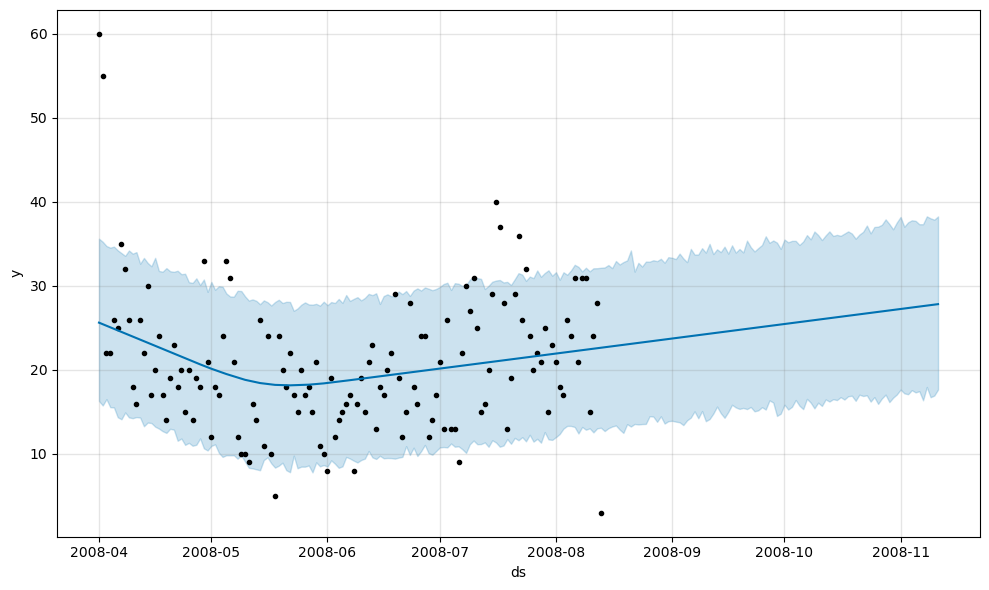

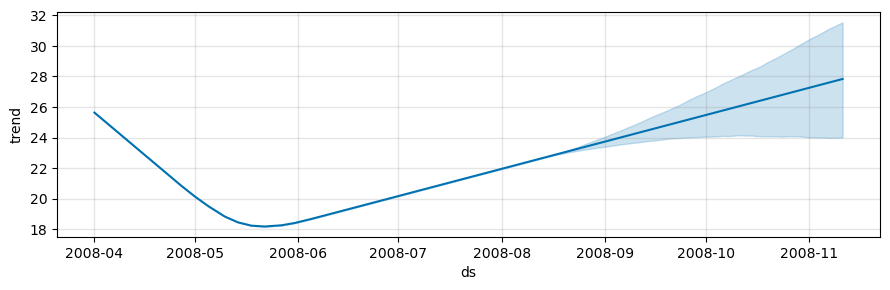

In [8]:
product_id = 'A11'
filtered_data = df[df['product_id']==product_id]
filtered_data.rename(columns={"date":"ds","view_counts":"y"},inplace=True)
model = Prophet(
    weekly_seasonality=False
)
model.fit(filtered_data)
future_dates = model.make_future_dataframe(periods=90)
forecast = model.predict(future_dates)
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)

In [9]:
# close the connection
cursor.close()
conn.close()